# Fact Check on Liar Liar

In [9]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [10]:
df_train = pd.read_csv('../dataset/liar_dataset/train.tsv', sep='\t')
df_test = pd.read_csv('../dataset/liar_dataset/test.tsv', sep='\t', names=['ID of the statement', 'label', 'statement', 'subject', 'speaker',
       'job title speaker', 'state', 'party affiliatio', 'barely true counts',
       'false counts', 'half true counts', 'mostly true counts',
       'pants on fire counts', 'context'])
df_valid = pd.read_csv('../dataset/liar_dataset/valid.tsv', sep='\t', names=['ID of the statement', 'label', 'statement', 'subject', 'speaker',
       'job title speaker', 'state', 'party affiliatio', 'barely true counts',
       'false counts', 'half true counts', 'mostly true counts',
       'pants on fire counts', 'context'])

# Data observation

In [11]:
print("training dataset size:")
print(df_train.shape)
print("test dataset size:")
print(df_test.shape)
print("validation dataset size:")
print(df_valid.shape)

training dataset size:
(10240, 14)
test dataset size:
(1267, 14)
validation dataset size:
(1284, 14)


In [12]:
df_train.columns.values

array(['ID of the statement', 'label', 'statement', 'subject', 'speaker',
       'job title speaker', 'state', 'party affiliatio',
       'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts', 'context'],
      dtype=object)

In [13]:
df_train.head(5)

,ID of the statement,label,statement,subject,speaker,job title speaker,state,party affiliatio,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [14]:
df_test.head(2)

,ID of the statement,label,statement,subject,speaker,job title speaker,state,party affiliatio,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference


In [15]:
#distribution of classes for prediction
def create_distribution(dataFile):
    return sns.countplot(x='label', data=dataFile, palette='hls')

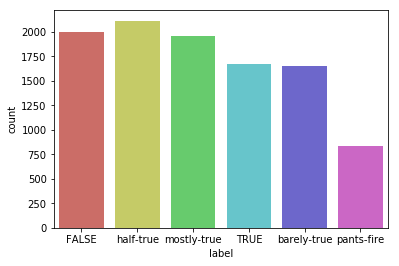

In [16]:
create_distribution(df_train)

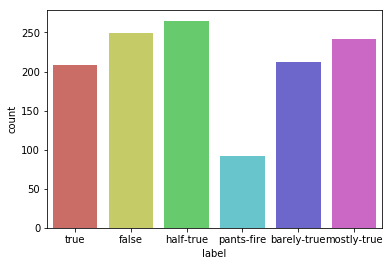

In [17]:
create_distribution(df_test)

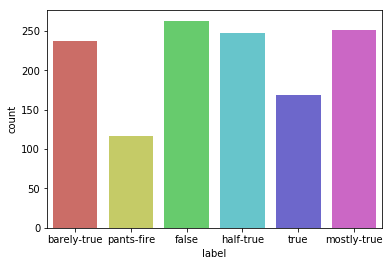

In [18]:
create_distribution(df_valid)

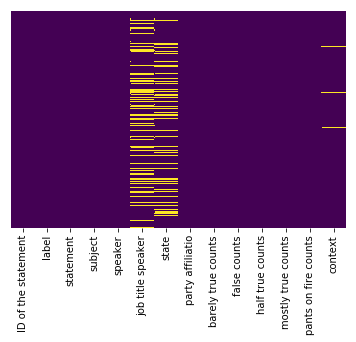

In [19]:
# to check missing values - data qualitites
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#df_train.isnull().sum()

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
ID of the statement     10240 non-null object
label                   10240 non-null object
statement               10240 non-null object
subject                 10238 non-null object
speaker                 10238 non-null object
job title speaker       7343 non-null object
state                   8032 non-null object
party affiliatio        10238 non-null object
barely true counts      10238 non-null float64
false counts            10238 non-null float64
half true counts        10238 non-null float64
mostly true counts      10238 non-null float64
pants on fire counts    10238 non-null float64
context                 10138 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [21]:
eng_stemmer = SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

In [22]:
#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed


In [23]:
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

#trigrams
def create_trigrams(words):
    assert type(words) == list
    skip == 0
    join_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,skip+2):
            for k1 in range(1, skip+2):
                for k2 in range(1,skip+2):
                    if ((i+k1 < Len) and (i+k1+k2 < Len)):
                        lst.append(join_str.join([words[i], words[i+k1],words[i+k1+k2]]))
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst

In [24]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

# Feature Selection

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [26]:
df_train['statement'].values

array(['Says the Annies List political group supports third-trimester abortions on demand.',
       'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
       'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
       ...,
       'Says an alternative to Social Security that operates in Galveston County, Texas, has meant that participants will retire with a whole lot more money than under Social Security.',
       'On lifting the U.S. Cuban embargo and allowing travel to Cuba.',
       "The Department of Veterans Affairs has a manual out there telling our veterans stuff like, 'Are you really of value to your community?' You know, encouraging them to commit suicide."],
      dtype=object)

## bag of words

### CountVectorizer

In [27]:
#we will start with simple bag of words technique 
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(df_train['statement'].values)

print(countV)
print(train_count)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3278)	1
  (0, 7728)	1
  (0, 615)	1
  (0, 11296)	1
  (0, 11036)	1
  (0, 10709)	1
  (0, 5115)	1
  (0, 8376)	1
  (0, 6639)	1
  (0, 1044)	1
  (0, 10988)	1
  (0, 9676)	1
  (1, 751)	1
  (1, 1964)	1
  (1, 4910)	1
  (1, 8554)	1
  (1, 5687)	1
  (1, 1532)	1
  (1, 11110)	1
  (1, 10980)	1
  (1, 7674)	1
  (1, 11138)	1
  (1, 4860)	1
  (1, 7418)	1
  (1, 10426)	2
  :	:
  (10239, 6853)	1
  (10239, 10594)	1
  (10239, 3989)	1
  (10239, 10918)	1
  (10239, 8996)	1
  (10239, 10660)	1
  (10239, 2549)	1
  (10239, 11622)	1
  (10239, 2568)	1
  (10239, 799)	1
  (10239, 11660)	2
  (10239, 12158)	1
  (10239, 3309)	1
  (10239, 11004)	1
  (10

In [28]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below

#vocab matrix size
print("-----vocab matrix size-----")
print(train_count.shape)

    #check vocabulary using below command
print("-----vocabulary used-----")
print(countV.vocabulary_)

    #get feature names
print("-----feature names-----")
print(countV.get_feature_names()[:25])

-----vocab matrix size-----
(10240, 12196)
-----vocabulary used-----
{'says': 9676, 'the': 10988, 'annies': 1044, 'list': 6639, 'political': 8376, 'group': 5115, 'supports': 10709, 'third': 11036, 'trimester': 11296, 'abortions': 615, 'on': 7728, 'demand': 3278, 'when': 11934, 'did': 3434, 'decline': 3185, 'of': 7672, 'coal': 2475, 'start': 10425, 'it': 6052, 'started': 10426, 'natural': 7418, 'gas': 4860, 'took': 11138, 'off': 7674, 'that': 10980, 'to': 11110, 'begin': 1532, 'in': 5687, 'president': 8554, 'george': 4910, 'bushs': 1964, 'administration': 751, 'hillary': 5401, 'clinton': 2444, 'agrees': 856, 'with': 12027, 'john': 6133, 'mccain': 6967, 'by': 1989, 'voting': 11748, 'give': 4954, 'bush': 1962, 'benefit': 1569, 'doubt': 3684, 'iran': 5999, 'health': 5310, 'care': 2096, 'reform': 9099, 'legislation': 6502, 'is': 6014, 'likely': 6605, 'mandate': 6834, 'free': 4735, 'sex': 9923, 'change': 2256, 'surgeries': 10721, 'economic': 3842, 'turnaround': 11351, 'at': 1259, 'end': 3990

## tf-df frequency features

In [29]:
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

print(train_tfidf.shape)
#get train data feature names 
print(train_tfidf.A[:10])

(10240, 12196)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### bag of words - with n-grams

In [30]:
#
countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
print(countV_ngram)
#tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [31]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)
print(tfidf_ngram)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


## Model

In [32]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [33]:
#string to test
doc_new = ['obama is running for president in 2016']

In [34]:
#logistic regression classifier
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

In [35]:
logR_pipeline_ngram.fit(df_train['statement'],df_train['label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(df_test['statement'])
np.mean(predicted_LogR_ngram == df_test['label'])

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.15390686661404893

In [29]:
# Validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy %s' % accuracy_score(predicted_LogR_ngram, df_test['label']))
#print(classification_report(df_test['label'], predicted_LogR_ngram)#y_pred))

accuracy 0.15390686661404893


In [30]:
logR_pipeline_ngram.predict(df_test['statement'])

array(['half-true', 'FALSE', 'TRUE', ..., 'half-true', 'FALSE', 'TRUE'],
      dtype=object)

In [31]:
df_test['label']

0              true
1             false
2             false
3         half-true
4        pants-fire
5              true
6              true
7       barely-true
8              true
9       barely-true
10      barely-true
11      barely-true
12       pants-fire
13            false
14        half-true
15             true
16       pants-fire
17        half-true
18             true
19            false
20      mostly-true
21        half-true
22       pants-fire
23      mostly-true
24            false
25             true
26      barely-true
27        half-true
28             true
29      mostly-true
           ...     
1237    mostly-true
1238     pants-fire
1239     pants-fire
1240     pants-fire
1241           true
1242      half-true
1243    barely-true
1244    mostly-true
1245    barely-true
1246    barely-true
1247           true
1248    barely-true
1249    barely-true
1250      half-true
1251    mostly-true
1252    mostly-true
1253           true
1254    mostly-true
1255          false


In [37]:
logR_pipeline_ngram.predict(["trump wants tax cut"])

array(['half-true'], dtype=object)

In [39]:
logR_pipeline_ngram.predict_proba(["trump wants tax cut"])

array([[0.16316773, 0.11788383, 0.13564744, 0.25595682, 0.25217297,
        0.07517121]])

In [33]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    k_fold = KFold(n_splits=2, random_state=None, shuffle=False)
    #k_fold = KFold(n=len(df_train), n_folds=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold:
        train_text = df_train.iloc[train_ind]['statement'] 
        train_y = df_train.iloc[train_ind]['label']
    
        test_text = df_train.iloc[test_ind]['statement']
        test_y = df_train.iloc[test_ind]['label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(df_train)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [34]:
build_confusion_matrix(logR_pipeline_ngram)

TypeError: 'KFold' object is not iterable

## grid-search parameter optimization

In [36]:
#logistic regression parameters
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(df_train['statement'][:10000],df_train['label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training sco

{'mean_fit_time': array([1.08631031, 1.06980141, 0.81119219, 0.52564645, 1.31991704,
        1.52867707, 1.38020126, 1.43781702, 2.33907811, 2.7627964 ,
        2.4001232 , 2.49436537, 3.5217464 , 3.87253372, 3.66643667,
        4.01146499, 5.0385383 , 5.71820029, 5.12666861, 4.69537059]),
 'std_fit_time': array([0.02739826, 0.02956855, 0.25023846, 0.00733966, 0.03105254,
        0.05398005, 0.05042999, 0.0041237 , 0.01371595, 0.05058851,
        0.11212951, 0.04010103, 0.01023326, 0.14105088, 0.04386039,
        0.064701  , 0.13576918, 0.18505197, 0.35707236, 0.15938836]),
 'mean_score_time': array([0.1335001 , 0.12585775, 0.13478446, 0.09483679, 0.1905663 ,
        0.19119525, 0.21998437, 0.16155251, 0.24564068, 0.20706646,
        0.25881489, 0.2742486 , 0.34353169, 0.3248984 , 0.35389241,
        0.39808329, 0.50418393, 0.36478058, 0.34800371, 0.24859977]),
 'std_score_time': array([1.94122071e-03, 9.23699616e-05, 1.30554600e-02, 3.11945361e-03,
        1.13233877e-02, 2.19386019e-

"""
by running both random forest and logistic regression with GridSearch's best parameter estimation, we found that for random 
forest model with n-gram has better accuracty than with the parameter estimated. The logistic regression model with best parameter 
has almost similar performance as n-gram model so logistic regression will be out choice of model for prediction.
"""

#### pickle model

In [35]:
#saving best model to the disk
model_file = '../dataset/liar_dataset/liar_liar_fact_check_factor_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'),protocol=2)

In [ ]:
#Plotting learing curve
def plot_learing_curve(pipeline,title):
    size = 10000
    cv = KFold(size, shuffle=True)
    
    X = df_train["statement"]
    y = df_train["label"]
    
    pl = pipeline
    pl.fit(X,y)
    
    train_sizes, train_scores, test_scores = learning_curve(pl, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
       
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
     
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

In [ ]:
#below command will plot learing curves for each of the classifiers
plot_learing_curve(logR_pipeline_ngram,"LogisticRegression Classifier")

"""
by plotting the learning cureve for logistic regression, it can be seen that cross-validation score is stagnating throughout and it 
is unable to learn from data. Also we see that there are high errors that indicates model is simple and we may want to increase the
model complexity.
"""

In [ ]:
#plotting Precision-Recall curve
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(df_test['label'], classifier)
    average_precision = average_precision_score(df_test['label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Random Forest Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

In [ ]:
plot_PR_curve(predicted_LogR_ngram)
#plot_PR_curve(predicted_rf_ngram)

In [ ]:
"""
Now let's extract the most informative feature from ifidf vectorizer for all fo the classifiers and see of there are any common
words that we can identify i.e. are these most informative feature acorss the classifiers are same? we will create a function that 
will extract top 50 features.
"""

def show_most_informative_features(model, vect, clf, text=None, n=50):
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps[vect]
    classifier = model.named_steps[clf]

     # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )
            
    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names()),
        reverse=True
    )
    
    # Get the top n and bottom n coef, name pairs
    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )
    #return "\n".join(output)
    print(output)


In [ ]:
show_most_informative_features(logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')

# Reference

https://github.com/nishitpatel01/Fake_News_Detection  Liar Liar

https://www.politifact.com/about/